#### import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

C:\Users\Maryam\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### read and edit train data

In [6]:
df_train = pd.read_csv("../Data/House Price Prediction/train.csv")
df_train["date"] = pd.to_datetime(df_train["date"])
df_train["year"] = df_train["date"].dt.year
df_train["month"] = df_train["date"].dt.month
print(df_train.head())

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0           0     0  ...              0      1955   
1      7242     2.0           0     0  ...            400      1951   
2     10000     1.0           0     0  ...              0      1933   
3      5000     1.0           0     0  ...            910      1965   
4      8080     1.0           0     0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  year  \
0             0    98178  47.5112 -122.257           1340    

#### set features and targets matrices for the train data

In [7]:
X_train = df_train.drop(['id', 'date', 'price', 'zipcode'],axis=1)
y_train = df_train["price"]

#### Linear Regression of train data 

In [9]:
reg1 = lm.LinearRegression()
reg1.fit(X_train, y_train)
Pred1 = reg1.predict(X_train)
print('Raw Data RMSE is:',round(np.sqrt(mse(y_train,Pred1)),2))
print('Raw Data R2 is:',round(r2_score(y_train,Pred1),2))

Raw Data RMSE is: 208926.31
Raw Data R2 is: 0.69


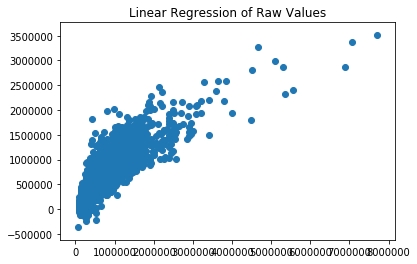

In [10]:
plt.plot(y_train, Pred1, '.')
plt.scatter(y_train, Pred1)
plt.title('Linear Regression of Raw Values')
plt.show()

#### Scaling with Standard Scaler 

In [11]:
scaleit = StandardScaler()
X_train1 = scaleit.fit_transform(X_train)
X_train1 = pd.DataFrame(X_train1, columns=X_train.columns)

#### 2nd Order Polynomial

In [12]:
poly = PolynomialFeatures(2)
X_train2 = poly.fit_transform(X_train1)
ploynames = poly.get_feature_names(X_train1.columns)
X_train2 = pd.DataFrame(X_train2, columns=ploynames)

#### Linear Regression of 2nd Order Polynomial of Scaled Date

In [13]:
reg2=lm.LinearRegression()
reg2.fit(X_train2,y_train)
Pred2=reg2.predict(X_train2)
print('2nd Order PN of SD RMSE is:',round(np.sqrt(mse(y_train,Pred2)),2))
print('2nd Order PN of SD R2 is:',round(r2_score(y_train,Pred2),2))

2nd Order PN of SD RMSE is: 152303.79
2nd Order PN of SD R2 is: 0.84


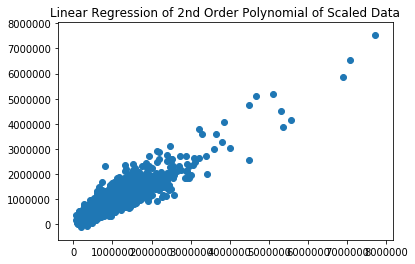

In [14]:
plt.plot(y_train,Pred2,'.')
plt.scatter(y_train,Pred2)
plt.title('Linear Regression of 2nd Order Polynomial of Scaled Data')
plt.show()

#### Dimension Reduction to n_components using PCA

PCA with  50  components RMSE is: 189063.42
PCA with  50  components R2 is: 0.75


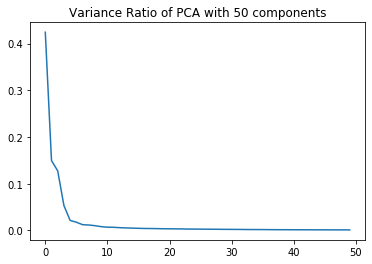

In [22]:
ncomp1=50
mypca1=PCA(n_components=ncomp1)
X_pca1=mypca1.fit_transform(X_train2)

reg3=lm.LinearRegression()
reg3.fit(X_pca1,y_train)
Pred3=reg3.predict(X_pca1)
print('PCA with ',  ncomp1, ' components RMSE is:',round(np.sqrt(mse(y_train,Pred3)),2))
print('PCA with ',  ncomp1, ' components R2 is:',round(r2_score(y_train,Pred3),2))

plt.plot(mypca1.explained_variance_ratio_)
plt.title('Variance Ratio of PCA with ' + str(ncomp1) + ' components')
plt.show()

PCA with  8  components RMSE is: 262784.06
PCA with  8  components R2 is: 0.51


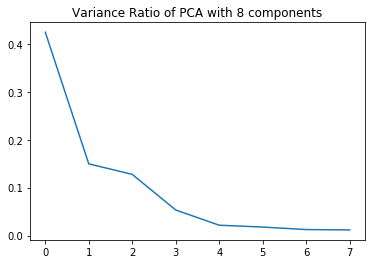

In [23]:
ncomp2=8
mypca2=PCA(n_components=ncomp2)
X_pca2=mypca2.fit_transform(X_train2)

reg4=lm.LinearRegression()
reg4.fit(X_pca2,y_train)
Pred4=reg4.predict(X_pca2)
print('PCA with ',  ncomp2, ' components RMSE is:',round(np.sqrt(mse(y_train,Pred4)),2))
print('PCA with ',  ncomp2, ' components R2 is:',round(r2_score(y_train,Pred4),2))

plt.plot(mypca2.explained_variance_ratio_)
plt.title('Variance Ratio of PCA with ' + str(ncomp2) + ' components')
plt.show()

PCA with  2  components RMSE is: 346489.34
PCA with  2  components R2 is: 0.16


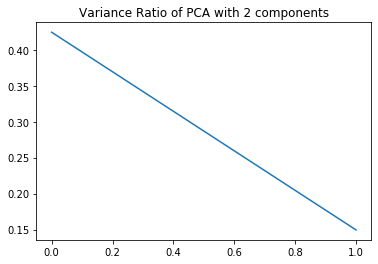

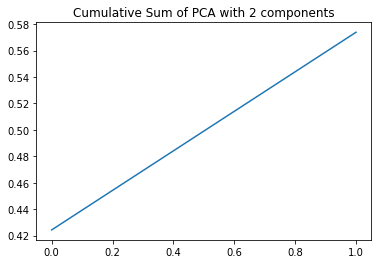

In [27]:
ncomp3=2
mypca3=PCA(n_components=ncomp3)
X_pca3=mypca3.fit_transform(X_train2)

reg5=lm.LinearRegression()
reg5.fit(X_pca3,y_train)
Pred5=reg5.predict(X_pca3)
print('PCA with ',  ncomp3, ' components RMSE is:',round(np.sqrt(mse(y_train,Pred5)),2))
print('PCA with ',  ncomp3, ' components R2 is:',round(r2_score(y_train,Pred5),2))

plt.plot(mypca3.explained_variance_ratio_)
plt.title('Variance Ratio of PCA with ' + str(ncomp3) + ' components')
plt.show()

plt.plot(np.cumsum(mypca3.explained_variance_ratio_))
plt.title('Cumulative Sum of PCA with ' + str(ncomp3) + ' components')
plt.show()

#### read test data

In [28]:
df_test = pd.read_csv("../Data/House Price Prediction/test.csv")
df_test["date"] = pd.to_datetime(df_test["date"])
df_test["year"] = df_test["date"].dt.year
df_test["month"] = df_test["date"].dt.month

In [29]:
X_test = df_test.drop(['id', 'date', 'zipcode'],axis=1)

In [30]:
# Standard Scaler
scaleix=StandardScaler()
X_test1=scaleix.fit_transform(X_test)
X_test1=pd.DataFrame(X_test1,columns=X_test.columns)

In [31]:
# 2nd Order Polynomial Transformation
poly2 = PolynomialFeatures(2)
X_test2 = poly2.fit_transform(X_test1)
polynames2 = poly2.get_feature_names(X_test1.columns)
X_test2 = pd.DataFrame(X_test2, columns=polynames2)

#### Transform the Test data with PCA with 8 components

In [34]:
X_test_PCA=mypca2.transform(X_test2)

#### Linear Regression of 2nd Order Polynomial of Scaled Date with PCA Dimension Reduction on Test Data

In [36]:
pred4 = reg4.predict(X_test_PCA)
df_test['price'] = pred4
print('pred4 is: ', pred4)
print(df_test.head(5))

pred4 is:  [574155.37091338 485376.85712979 434017.46532756 ... 556967.68056864
 413837.341119   557534.67769553]
           id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7818900060 2014-07-08         4       2.50         1910     10300     1.0   
1  2126059139 2015-03-18         5       3.25         3160     10587     1.0   
2  1759701600 2014-05-12         3       1.50         2020     11358     1.0   
3  1795920310 2014-08-04         4       3.75         3210      7054     2.0   
4  1626069139 2014-08-21         3       2.25         2350     51400     1.0   

   waterfront  view  condition  ...  yr_built  yr_renovated  zipcode      lat  \
0           0     0          3  ...      1921          1968    98177  47.7581   
1           0     0          5  ...      1960             0    98034  47.7238   
2           0     0          4  ...      1956             0    98033  47.6641   
3           0     0          4  ...      1985             0    98052  47.7268   


#### write outputs into a csv file

In [37]:
df_test.to_csv('test_priced_PCA.csv')